# XGBoost Parameter Tuning for Rent Listing Inqueries

# 第五步：调整正则化参数：reg_alpha 和reg_lambda

首先 import 必要的模块

In [10]:
from xgboost import XGBClassifier
import xgboost as xgb

import pandas as pd 
import numpy as np

import math

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

## 读取数据

In [11]:
# path to where the data lies
dpath = './data/'
train = pd.read_csv(dpath +"RentListingInquries_FE_train.csv")
test = pd.read_csv(dpath +"RentListingInquries_FE_test.csv")

In [12]:
Y = train['interest_level']
X = train.drop(["interest_level"], axis=1)
X = np.array(X)

In [13]:
X_train=X
y_train=Y

In [14]:
test.index

RangeIndex(start=0, stop=74659, step=1)

各类样本不均衡，交叉验证是采用StratifiedKFold，在每折采样时各类样本按比例采样

In [15]:
# prepare cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

第二轮参数调整得到的n_estimators最优值（231），其余参数继续默认值

用交叉验证评价模型性能时，用scoring参数定义评价指标。评价指标是越高越好，因此用一些损失函数当评价指标时，需要再加负号，如neg_log_loss，neg_mean_squared_error 详见sklearn文档：http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss

In [16]:
#reg_alpha = [1e-3, 1e-2, 0.05, 0.1]    #default = 0
#reg_lambda = [1e-3, 1e-2, 0.05, 0.1]   #default = 1

reg_alpha = [ 0.1,1,1.5, 2]    #default = 0, 测试0.1,1，1.5，2
reg_lambda = [0.1,0.5, 1, 2]      #default = 1，测试0.1， 0.5， 1，2

param_test = dict(reg_alpha=reg_alpha, reg_lambda=reg_lambda)
param_test


{'reg_alpha': [0.1, 1, 1.5, 2], 'reg_lambda': [0.1, 0.5, 1, 2]}

In [17]:
xgb = XGBClassifier(
        learning_rate =0.1,
        n_estimators=231,  #第二轮参数调整得到的n_estimators最优值
        max_depth=6,
        min_child_weight=7,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        colsample_bylevel = 0.7,
        objective= 'multi:softprob',
        seed=3)


gsearch = GridSearchCV(xgb, param_grid = param_test, scoring='neg_log_loss',n_jobs=-1,cv=kfold)
gsearch.fit(X_train , y_train)

gsearch.grid_scores_, gsearch.best_params_,     gsearch.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.58191, std: 0.00280, params: {'reg_alpha': 0.1, 'reg_lambda': 0.1},
  mean: -0.58170, std: 0.00242, params: {'reg_alpha': 0.1, 'reg_lambda': 0.5},
  mean: -0.58248, std: 0.00319, params: {'reg_alpha': 0.1, 'reg_lambda': 1},
  mean: -0.58211, std: 0.00357, params: {'reg_alpha': 0.1, 'reg_lambda': 2},
  mean: -0.58200, std: 0.00258, params: {'reg_alpha': 1, 'reg_lambda': 0.1},
  mean: -0.58248, std: 0.00253, params: {'reg_alpha': 1, 'reg_lambda': 0.5},
  mean: -0.58216, std: 0.00271, params: {'reg_alpha': 1, 'reg_lambda': 1},
  mean: -0.58218, std: 0.00270, params: {'reg_alpha': 1, 'reg_lambda': 2},
  mean: -0.58199, std: 0.00271, params: {'reg_alpha': 1.5, 'reg_lambda': 0.1},
  mean: -0.58246, std: 0.00294, params: {'reg_alpha': 1.5, 'reg_lambda': 0.5},
  mean: -0.58226, std: 0.00274, params: {'reg_alpha': 1.5, 'reg_lambda': 1},
  mean: -0.58245, std: 0.00281, params: {'reg_alpha': 1.5, 'reg_lambda': 2},
  mean: -0.58182, std: 0.00281, params: {'reg_alpha': 2, 'reg_lambda': 0

In [18]:
gsearch.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([713.21799569, 712.63105869, 724.07543535, 712.9641994 ,
        745.94316812, 724.36711216, 799.23339968, 752.36486874,
        758.07573066, 715.13089142, 707.22645922, 692.20661044,
        719.28764806, 695.6249959 , 695.22657075, 659.3462852 ]),
 'mean_score_time': array([1.67966819, 1.70693941, 1.80008707, 1.66363235, 1.90496778,
        1.9432682 , 1.87157707, 1.88571444, 1.7811377 , 1.74153118,
        1.70252905, 1.66733689, 1.75236259, 1.67786369, 1.66893973,
        1.37296162]),
 'mean_test_score': array([-0.58190761, -0.58169861, -0.58248046, -0.5821079 , -0.58199914,
        -0.5824808 , -0.58216425, -0.58217825, -0.58198617, -0.5824611 ,
        -0.58225655, -0.58244979, -0.58182343, -0.58229297, -0.58201833,
        -0.58224401]),
 'mean_train_score': array([-0.47094293, -0.4718298 , -0.47330742, -0.47524097, -0.46880937,
        -0.46992065, -0.47140778, -0.47422155, -0.46968332, -0.47073766,
        -0.47236023, -0.47487827, -0.47140149, -0.472

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\dep

Best: -0.581699 using {'reg_alpha': 0.1, 'reg_lambda': 0.5}


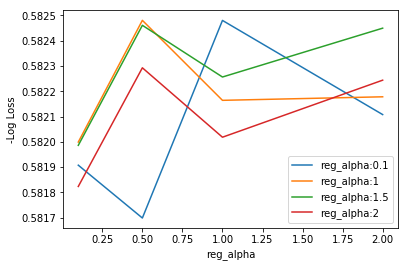

In [19]:
# summarize results
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))
test_means = gsearch.cv_results_[ 'mean_test_score' ]
test_stds = gsearch.cv_results_[ 'std_test_score' ]
train_means = gsearch.cv_results_[ 'mean_train_score' ]
train_stds = gsearch.cv_results_[ 'std_train_score' ]

pd.DataFrame(gsearch.cv_results_).to_csv('my_preds_reg_alpha_reg_lambda_1.csv')

# plot results
test_scores = np.array(test_means).reshape(len(reg_alpha), len(reg_lambda))
train_scores = np.array(train_means).reshape(len(reg_alpha), len(reg_lambda))

#log_reg_alpha = [0,0,0,0]
#for index in range(len(reg_alpha)):
#   log_reg_alpha[index] = math.log10(reg_alpha[index])
    
for i, value in enumerate(reg_alpha):
    pyplot.plot(reg_lambda, -test_scores[i], label= 'reg_alpha:'   + str(value))
#for i, value in enumerate(min_child_weight):
#    pyplot.plot(max_depth, train_scores[i], label= 'train_min_child_weight:'   + str(value))
    
pyplot.legend()
pyplot.xlabel( 'reg_alpha' )                                                                                                      
pyplot.ylabel( '-Log Loss' )
pyplot.savefig( 'reg_alpha_vs_reg_lambda1.png' )